# Basic classification: Classify images of clothing

Author: Amir Fawwaz

Affliation: HT Consulting (Asia) Sdn. Bhd., Kelana Jaya, Malaysia

Published: 17 July 2024

##### Copyright 2018 The TensorFlow Authors.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Build a training pipeline

Apply the following transformations:

- tf.data.Dataset.map: TFDS provide images of type tf.uint8, while the model expects tf.float32. Therefore, you need to normalize images.
- tf.data.Dataset.cache As you fit the dataset in memory, cache it before shuffling for a better performance. **Note**: Random transformations should be applied after caching.
- tf.data.Dataset.shuffle: For true randomness, set the shuffle buffer to the full dataset size.**Note**: For large datasets that can't fit in memory, use buffer_size=1000 if your system allows it.
- tf.data.Dataset.batch: Batch elements of the dataset after shuffling to get unique batches at each epoch.
- tf.data.Dataset.prefetch: It is good practice to end the pipeline by prefetching for performance.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

Build an evaluation pipeline

Your testing pipeline is similar to the training pipeline with small differences:

- You don't need to call `tf.data.Dataset.shuffle`.
- Caching is done after batching because batches can be the same between epochs.


In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create and train the model

Plug the TFDS input pipeline into a simple Keras model, compile the model, and train it.

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 8s 6ms/step - loss: 0.5599 - sparse_categorical_accuracy: 0.8079 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.8464
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4096 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8513
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3700 - sparse_categorical_accuracy: 0.8695 - val_loss: 0.4063 - val_sparse_categorical_accuracy: 0.8565
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3401 - sparse_categorical_accuracy: 0.8783 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8657
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3225 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3772 - val_sparse_categorical_accuracy: 0.8595
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3074 - sparse_categorica

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


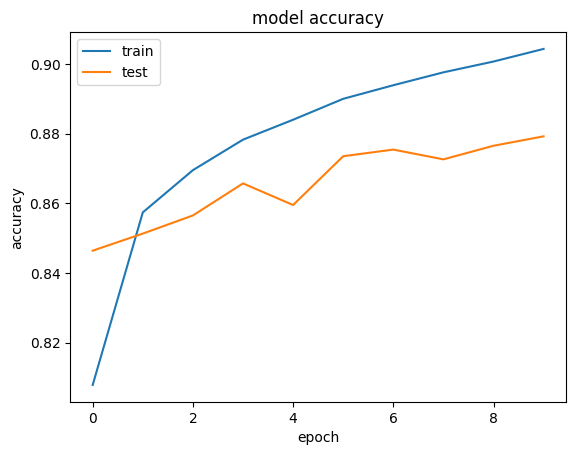

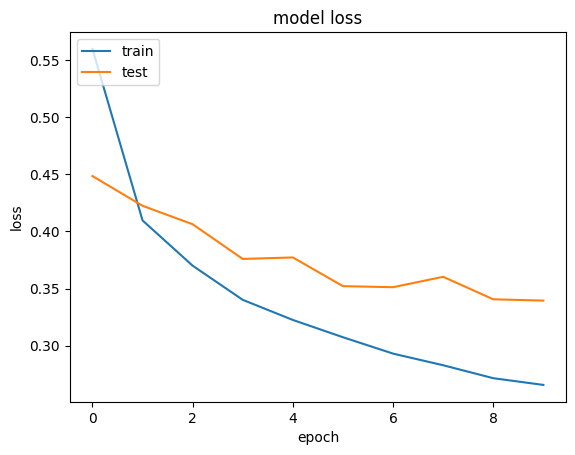

In [8]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [9]:
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.3395 - sparse_categorical_accuracy: 0.8792 - 365ms/epoch - 5ms/step

Test accuracy: 0.8791999816894531


Test accuracy should be almost the same as previous method